# Corporate Credit Rating Forecasting 


Libraries used:
- car
- ggplot2
- grid
- gridExtra
- RColorBrewer
- reshape2
- scales
- stats

## Introduction

This notebook contains the results of the data analysis performed on a set of house sales data from a residential real estate market. The aim of the data analysis is to build a linear regression model from the real estate transaction data that can be used to predict the sales price of a house.

The first section section of the notebook shows the exploratory data analysis (EDA) performed to explore and understand the data. It looks at each attribute (variable) in the data to understand the nature and distribution of the attribute values. It also examines the correlation between the variables through visual analysis. A summary at the end highlights the key findings of the EDA.

The second section shows the development of the linear regression model. It details the process used to build the model and shows the model at key points in the development process. The final model is then presented along with an analysis and interpretation of the model. This section concludes with the results of using the model to predict house prices for the data in the development dataset.

The final section provides the details of the model to enable it to be rebuilt. In addition to the model itself, it includes the functions used to transform the data and run the model.

Two datasets were provided for the assignment - training.csv and dev.csv. The exploratory data analysis and the model building were done using the training.csv dataset; the dev.csv dataset was only used to test the generated model

#### Import Libraries

In [621]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

## Data Exploration

In [622]:
df_rating = pd.read_csv('data/rating_dataframe.csv')

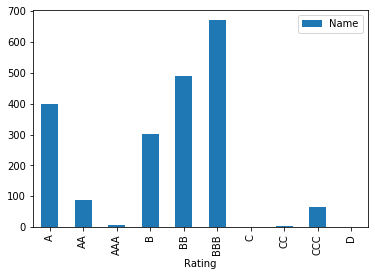

In [623]:
df_rating_summary = df_rating.groupby('Rating').count().reset_index()
df_rating_summary.plot.bar(x='Rating', y = 'Name')

It is better to join all the A's together. 

In [285]:
df_rating.loc[df_rating['Rating'] == 'AA','Rating'] = 'A' 
df_rating.loc[df_rating['Rating'] == 'AAA','Rating'] = 'A' 
df_rating.loc[df_rating['Rating'] == 'CC','Rating'] = 'C' 
df_rating.loc[df_rating['Rating'] == 'CCC','Rating'] = 'C' 
df_rating.loc[df_rating['Rating'] == 'D','Rating'] = 'C'

### EDA

In [522]:
df_rating.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,payoutRatio
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,...,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718,-0.085374
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,...,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588,40.443603
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850,-1735.047170
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,...,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912,0.000000
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,...,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722,0.212845
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,...,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892,0.465593
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400,412.136640


In [523]:
skewValue = df_rating.skew(axis=0)
skewValue

currentRatio                          34.338889
quickRatio                            30.925641
cashRatio                             27.098772
daysOfSalesOutstanding                20.399567
netProfitMargin                       17.619910
pretaxProfitMargin                    22.096334
grossProfitMargin                    -14.203446
operatingProfitMargin                 26.493892
returnOnAssets                       -32.112571
returnOnCapitalEmployed              -33.318531
returnOnEquity                        31.702500
assetTurnover                         26.020347
fixedAssetTurnover                    26.120457
debtEquityRatio                        0.268993
debtRatio                              1.285251
effectiveTaxRate                      32.308742
freeCashFlowOperatingCashFlowRatio   -22.913129
freeCashFlowPerShare                  33.677207
cashPerShare                          34.025861
companyEquityMultiplier                0.269093
ebitPerRevenue                        22

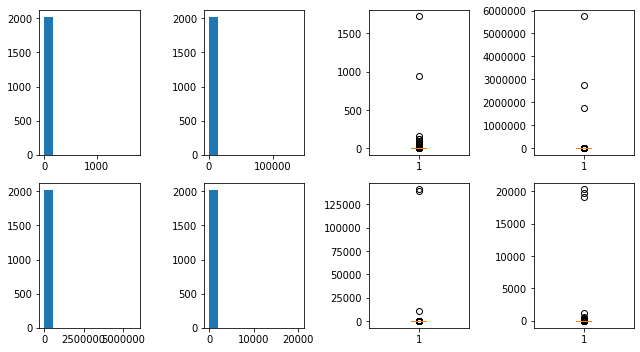

In [524]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))
axes[0, 0].hist(df_rating.currentRatio)
axes[0, 1].hist(df_rating.returnOnEquity)
axes[1, 0].hist(df_rating.freeCashFlowPerShare)
axes[1, 1].hist(df_rating.payablesTurnover)

axes[0, 2].boxplot(df_rating.currentRatio)
axes[1, 2].boxplot(df_rating.returnOnEquity)
axes[0, 3].boxplot(df_rating.freeCashFlowPerShare)
axes[1, 3].boxplot(df_rating.payablesTurnover)

figure.tight_layout()

#### Log conversion

In [525]:
from sklearn import preprocessing

In [526]:
columns = df_rating.columns[6:]

In [527]:
min_max_scaler = preprocessing.MinMaxScaler()

for c in columns:
    
    float_array = df_rating[[c]].copy().values.astype(float)
    min_max_scaler = preprocessing.MinMaxScaler()
    scaled_array = min_max_scaler.fit_transform(float_array) + 0.1
    df_rating[c + 'log'] = scaled_array
    df_rating[c + 'log'] = df_rating[c + 'log'].apply(np.log)

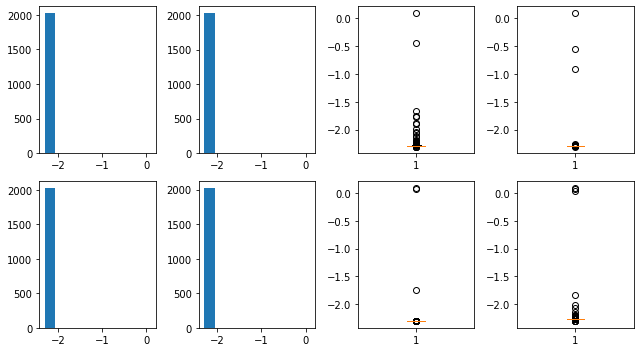

In [528]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))
axes[0, 0].hist(df_rating.currentRatiolog)
axes[0, 1].hist(df_rating.returnOnEquitylog)
axes[1, 0].hist(df_rating.freeCashFlowPerSharelog)
axes[1, 1].hist(df_rating.payablesTurnoverlog)

axes[0, 2].boxplot(df_rating.currentRatiolog)
axes[1, 2].boxplot(df_rating.returnOnEquitylog)
axes[0, 3].boxplot(df_rating.freeCashFlowPerSharelog)
axes[1, 3].boxplot(df_rating.payablesTurnoverlog)

figure.tight_layout()

# Remove Outlieres

In [529]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
from random import sample 

ratings = ['A', 'B', 'BB', 'BBB', 'C']

def remove_outlier(df_input, col_name):

    df_out = df_input[0:0].copy()
    
    for c in ratings:
    
        df_in = df_input.loc[df_input.Rating  ==  c].copy()
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
        q5 = df_in[col_name].quantile(0.5)
        iqr = q3-q1 #Interquartile range
        fence_low  = q3-1.5*iqr
        fence_high = q1+1.5*iqr
    
        df_in.loc[(df_in[col_name] < fence_low),col_name] = sample(list(df_in.loc[(df_in[col_name] > fence_low) & 
                                                                                  (df_in[col_name] < q5),
                                                                                  col_name]),
                                                                   len(df_in.loc[(df_in[col_name] < fence_low),col_name]))
    
    
        df_in.loc[(df_in[col_name] > fence_high),col_name] = sample(list(df_in.loc[(df_in[col_name] > q5) & 
                                                                                  (df_in[col_name] < fence_high),
                                                                                  col_name]),
                                                                    len(df_in.loc[(df_in[col_name] > fence_high),col_name]))
    
        frames = [df_out, df_in]
        df_out = pd.concat(frames) 

    return df_out

In [530]:
for c in df_rating.columns[6:31]:
    df_rating = remove_outlier(df_rating, c)

ValueError: Sample larger than population or is negative

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))
axes[0, 0].hist(df_rating.currentRatiolog)
axes[0, 1].hist(df_rating.returnOnEquitylog)
axes[1, 0].hist(df_rating.freeCashFlowPerSharelog)
axes[1, 1].hist(df_rating.payablesTurnoverlog)

axes[0, 2].boxplot(df_rating.currentRatiolog)
axes[1, 2].boxplot(df_rating.returnOnEquitylog)
axes[0, 3].boxplot(df_rating.freeCashFlowPerSharelog)
axes[1, 3].boxplot(df_rating.payablesTurnoverlog)

figure.tight_layout()

# Analyse Relations

In [569]:
df_rating.colors = 'a'
df_rating.loc[df_rating['Rating'] == 'A', 'color'] = 'r'
df_rating.loc[df_rating['Rating'] == 'B', 'color'] = 'g'
df_rating.loc[df_rating['Rating'] == 'BB', 'color'] = 'b'
df_rating.loc[df_rating['Rating'] == 'BBB','color'] = 'y'
df_rating.loc[df_rating['Rating'] == 'C', 'color'] = 'm'


ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not 0         r
1         y
2         y
3         y
4         y
       ... 
2024      y
2025      b
2026      g
2027      g
2028    NaN
Name: color, Length: 2029, dtype: object.

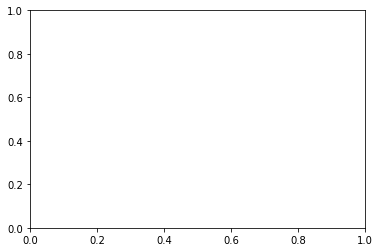

In [570]:
plt.scatter(df_rating.returnOnAssets, df_rating.returnOnCapitalEmployed, c = df_rating.color, alpha=0.5)
plt.show()

In [571]:
df_rating.groupby('Rating').mean()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,payoutRatio
Rating,,,,,,,,,,,,,,,,,,,,,
A,1.538695,1.327016,0.385079,171.168722,0.590435,0.863640,0.556080,1.040302,0.071436,0.136976,...,0.573076,26.161248,48.874806,3.780445,0.866412,10.939248,103.318712,1.495428,6.774101,0.286710
AA,1.723888,1.227023,0.390321,40.635753,0.124043,0.165942,0.627899,0.173166,0.092874,0.172885,...,0.902069,83.025380,184.041180,2.222550,0.166796,10.532753,462.707627,0.189398,670.839163,0.446723
AAA,2.274625,2.063972,0.274089,67.678733,0.212323,0.117229,0.734484,0.274609,0.109992,0.071989,...,0.776531,3.961642,9.923552,2.082451,0.117229,12.204365,5.682929,0.346676,3.784628,0.487933
B,5.431595,1.830320,0.634058,67.385079,0.141831,0.211195,0.499278,0.248749,-118.765198,-208.882685,...,0.027576,52.968464,90.703789,-6.805406,0.218886,148.564115,-13.168759,0.639844,8.048441,0.317992
BB,2.579726,6.165528,0.937828,950.263229,-0.281538,-0.334636,0.446694,-0.225784,-0.226759,0.051039,...,0.367777,9234.334962,7497.555030,1.489030,-0.329640,73.942903,13585.272504,1.679154,12.551026,1.850422
BBB,1.753954,1.242471,0.419345,171.933980,0.641484,0.953623,0.460779,1.207154,0.051597,0.091791,...,0.499515,8604.119826,7193.585692,5.176333,0.961297,11.801629,9662.001115,1.942878,7.631958,0.591676
C,1.286105,0.635879,0.578643,3.644017,0.449925,0.722794,0.515868,0.099135,0.067283,0.395384,...,-1.524296,-0.933089,5.808174,5.638925,0.722794,8.085984,0.537463,0.022305,9.472004,-0.034032
CC,1.110003,0.672340,0.379967,15.830629,-0.549850,-0.610106,0.769635,-0.570298,-8042.909871,-17432.871752,...,0.298548,1212.370650,10.393418,-1.859115,-0.610106,4.093561,-269.074276,0.029997,2.022818,-0.003721
CCC,35.778208,5.008539,3.573252,55.744425,-0.253064,-0.344592,0.676688,-0.177128,-0.052983,-0.070988,...,-0.084502,-13.928158,213.115198,45.128958,-0.328738,55.076877,33.971570,0.044647,14.779026,-27.034016


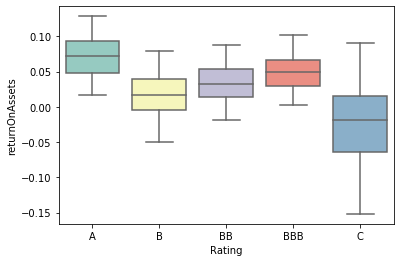

In [299]:
import seaborn as sns

# ax = sns.boxplot(x=df_rating.Rating, y=df_rating.currentRatio,palette="Set3")
# ax = sns.boxplot(x=df_rating.Rating, y=df_rating.quickRatio,palette="Set3")
# ax = sns.boxplot(x=df_rating.Rating, y=df_rating.daysOfSalesOutstanding,palette="Set3")
ax = sns.boxplot(x=df_rating.Rating, y=df_rating.returnOnAssets,palette="Set3")

# Boxplot

In [300]:
df_plot = df_rating.copy()
df_plot = df_plot.iloc[:,0:32]
df_plot.drop(df_plot.columns[1:6], axis = 1, inplace = True)

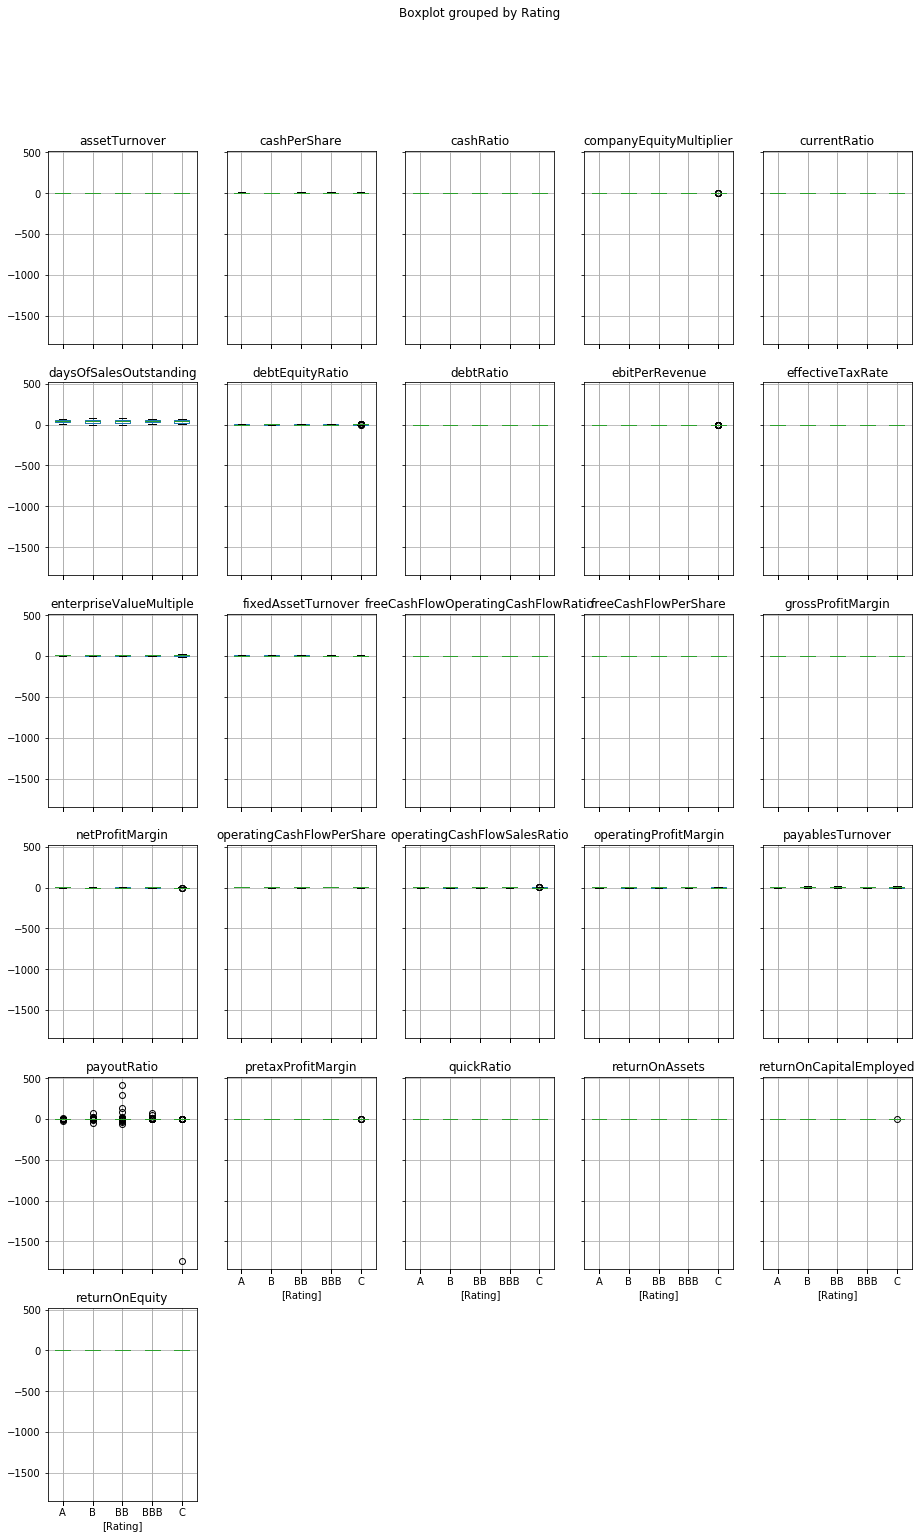

In [301]:
boxplot = df_plot.boxplot(by='Rating', figsize=(15,25))

# PCA

In [302]:
df_rating.columns[32]

'currentRatiolog'

In [303]:
from sklearn.preprocessing import StandardScaler

In [304]:
features = df_rating.columns[6:32]

# Separating out the features
x = df_rating.loc[:, features].values
# Separating out the target
y = df_rating.loc[:,['Rating']].values
# Standardizing the features
# x = StandardScaler().fit_transform(x)

In [305]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2','pca3','pca4','pca5'])

In [306]:
finalDf = pd.concat([principalDf, df_rating[['Rating']]], axis = 1)

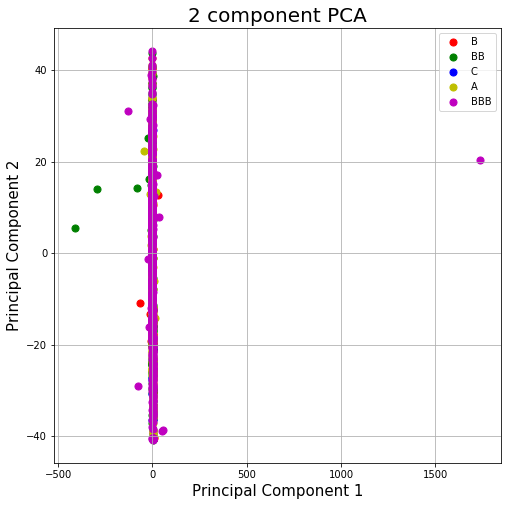

In [307]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(set(df_rating.Rating))
colors = ['r', 'g', 'b','y', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Rating'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca1'], 
               finalDf.loc[indicesToKeep, 'pca2'], 
               c = color, 
               s = 50)

ax.legend(targets)
ax.grid()

In [308]:
sum(pca.explained_variance_ratio_)

0.9915312978518638

In [309]:
# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBOOST

In [687]:
# Separate majority and minority classes
df_A = df_rating[df_rating.Rating == 'AA']
df_AA = df_rating[df_rating.Rating == 'AA']
df_B = df_rating[df_rating.Rating == 'B']
df_BB = df_rating[df_rating.Rating == 'BB']
df_BBB = df_rating[df_rating.Rating == 'BBB']
df_CCC = df_rating[df_rating.Rating == 'CCC']
df_upsampled = pd.concat([df_A, df_AA, df_AAA, df_B, df_BB, df_BBB, df_CCC])

len(df_BBB)

671

In [688]:
X, y = df_upsampled.iloc[:,6:32], df_upsampled.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [689]:
from sklearn.utils import resample

# Upsample minority class
df_A = resample(df_A, replace=True, n_samples=671, random_state=123) 
df_AA = resample(df_AA, replace=True, n_samples=671, random_state=123) 
df_AAA = resample(df_AAA, replace=True, n_samples=671, random_state=123) 
df_B = resample(df_B, replace=True, n_samples=671, random_state=123) 
df_BB = resample(df_BB, replace=True, n_samples=671, random_state=123) 
df_C = resample(df_C, replace=True, n_samples=671, random_state=123) 
df_CC = resample(df_CC, replace=True, n_samples=671, random_state=123) 
df_CCC = resample(df_CCC, replace=True, n_samples=671, random_state=123) 

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_A, df_AA, df_AAA, df_B, df_BB, df_BBB, df_CCC])


In [690]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [691]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X, y = df_upsampled.iloc[:,6:32], df_upsampled.iloc[:,0]

In [692]:
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

In [693]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.8659217877094972

In [694]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 61,   2,   0,   0,   2,  10,   0],
       [  0,  29,   0,   0,   0,   0,   0],
       [  0,   0, 129,   0,   0,   0,   0],
       [  0,   0,   0,  54,   4,   3,   0],
       [  3,   3,   0,  10,  68,   9,   0],
       [ 11,   0,   0,   5,   9, 112,   1],
       [  0,   0,   0,   0,   0,   0,  12]], dtype=int64)

# Support Vector Machine

In [695]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma= 2, C = 5)
clf = clf.fit(X_train, y_train)

In [696]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8994413407821229


# NN

In [697]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='logistic', solver='adam', max_iter=500).fit(X_train, y_train)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4208566108007449


# Naive Bayes

In [698]:
from sklearn.naive_bayes import GaussianNB
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.25139664804469275


# KNN

In [699]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)

In [700]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5493482309124768


# Logistic Regression

In [701]:
from sklearn.linear_model import LogisticRegression
# X_train, y_test = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0 , multi_class='multinomial', solver='newton-cg')
model = clf.fit(X_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [702]:
y_pred= model.predict(X_test)

In [703]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4338919925512104


# Random Forest

In [704]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [705]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9329608938547486


### LDA

In [706]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [707]:
y_pred=clf.predict(X_test)

In [708]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4376163873370577


# QDA

In [709]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [710]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3929236499068901
